# Tutorial

### Instructions

In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.



In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


data = pd.read_csv("datasets/data.csv")


print(data.head())


X = data.drop('Bankrupt?', axis=1)  
y = data['Bankrupt?']  # Target variable

# Handling missing values if any
X.fillna(X.mean(), inplace=True)  # Replace missing values with column mean (you can adjust this as needed)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.4577

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [29]:
# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.967008797653959
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.80      0.16      0.26        51

    accuracy                           0.97      1364
   macro avg       0.88      0.58      0.62      1364
weighted avg       0.96      0.97      0.96      1364

Confusion Matrix:
 [[1311    2]
 [  43    8]]


In [30]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit grid search
grid_search.fit(X_train_scaled, y_train)

# Get best parameters
print("Best Parameters:", grid_search.best_params_)



Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}


In [31]:
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_model.predict(X_test_scaled)

# Final evaluation
print("Accuracy of Best Model:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


Accuracy of Best Model: 0.9655425219941349
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.70      0.14      0.23        51

    accuracy                           0.97      1364
   macro avg       0.83      0.57      0.61      1364
weighted avg       0.96      0.97      0.95      1364



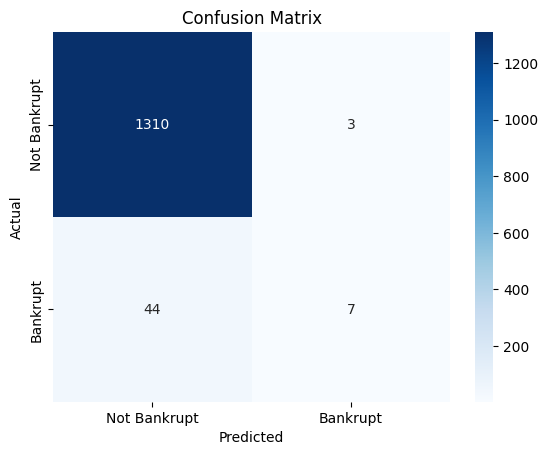

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Bankrupt", "Bankrupt"], yticklabels=["Not Bankrupt", "Bankrupt"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [33]:
from sklearn.linear_model import LogisticRegression
# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Train the model with the scaled training data
logreg.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

In [34]:
# Predict the target values for the test data
y_pred = logreg.predict(X_test_scaled)


Accuracy: 0.9640762463343109
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.56      0.20      0.29        51

    accuracy                           0.96      1364
   macro avg       0.76      0.59      0.64      1364
weighted avg       0.95      0.96      0.96      1364

Confusion Matrix:
[[1305    8]
 [  41   10]]


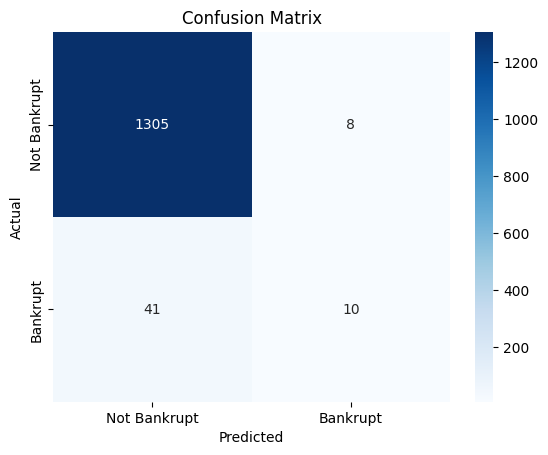

In [35]:
# Accuracy score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Classification Report: includes precision, recall, f1-score, and support
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix: shows the distribution of predicted vs actual values
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Optional: Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Bankrupt", "Bankrupt"], yticklabels=["Not Bankrupt", "Bankrupt"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [36]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # Regularization type (you can also try 'l1' for Lasso)
    'solver': ['liblinear']  # Solver to use (liblinear works well for small datasets)
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
print("Best Parameters from GridSearchCV:", grid_search.best_params_)

# Get the best model
best_logreg = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_logreg.predict(X_test_scaled)

# Evaluate the best model
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report of Best Model:\n", classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters from GridSearchCV: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best Model Accuracy: 0.9655425219941349
Classification Report of Best Model:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.75      0.12      0.20        51

    accuracy                           0.97      1364
   macro avg       0.86      0.56      0.59      1364
weighted avg       0.96      0.97      0.95      1364



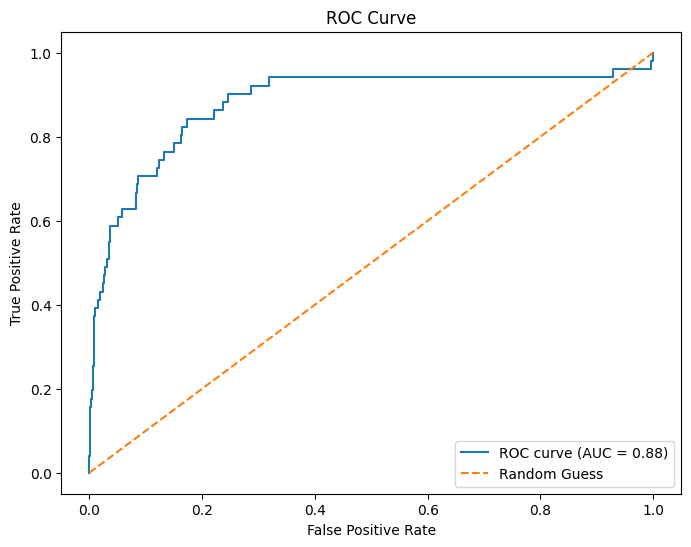

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
auc = roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [38]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.56      0.20      0.29        51

    accuracy                           0.96      1364
   macro avg       0.76      0.59      0.64      1364
weighted avg       0.95      0.96      0.96      1364



Fitting 3 folds for each of 27 candidates, totalling 81 fits


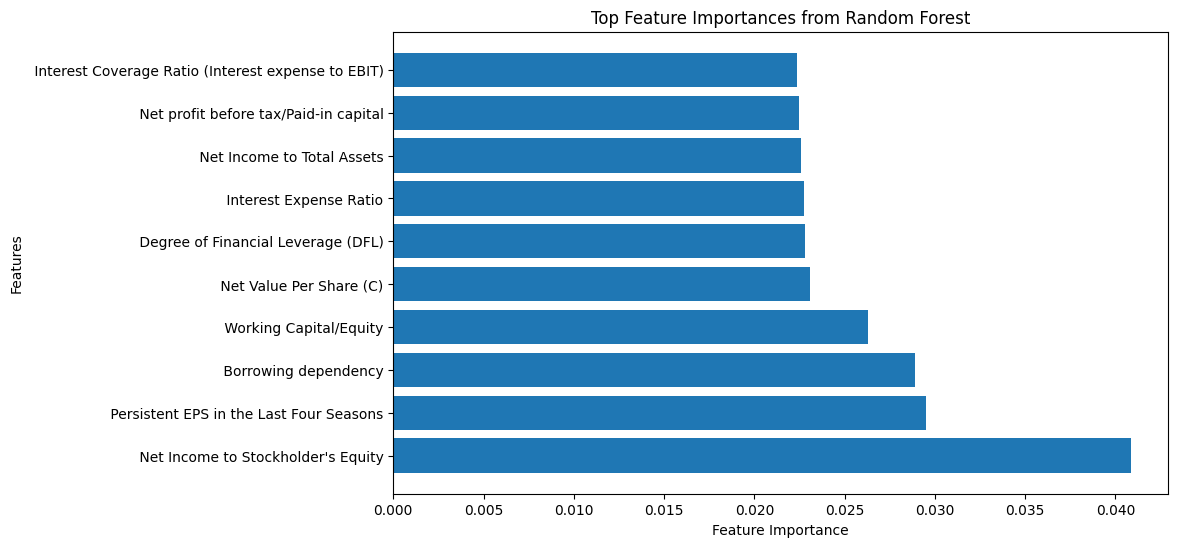

 Net Income to Stockholder's Equity: 0.04088583840030921
 Persistent EPS in the Last Four Seasons: 0.029518068719249436
 Borrowing dependency: 0.028893195500484345
 Working Capital/Equity: 0.02627530056503931
 Net Value Per Share (C): 0.02307984339947066
 Degree of Financial Leverage (DFL): 0.022799427914794817
 Interest Expense Ratio: 0.02273530019913545
 Net Income to Total Assets: 0.02256495407696646
 Net profit before tax/Paid-in capital: 0.022490369748922583
 Interest Coverage Ratio (Interest expense to EBIT): 0.022358965601159526


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is already loaded with the company financial data
# X is the feature set and y is the target variable
X = data.drop('Bankrupt?', axis=1)  # Features
y = data['Bankrupt?']  # Target (0: No Bankruptcy, 1: Bankruptcy)

# Handle missing data (if any)
X = X.fillna(X.mean())  # Impute missing values with column means

# Feature scaling (important for some models)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit grid search
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Get feature importances from the trained Random Forest model
feature_importances = best_rf_model.feature_importances_

# Get feature names (assuming X is a DataFrame)
features = X.columns  # If X is a DataFrame

# Sort the features based on importance (descending order)
indices = np.argsort(feature_importances)[::-1]

# Plotting the top features
plt.figure(figsize=(10, 6))
plt.title("Top Feature Importances from Random Forest")
plt.barh(range(10), feature_importances[indices][:10], align="center")
plt.yticks(range(10), [features[i] for i in indices[:10]])  # Top 10 features
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

# Optionally, you can print the top features along with their importance scores
for i in range(10):
    print(f"{features[indices[i]]}: {feature_importances[indices[i]]}")




AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'